Modelling Spotify data with Ridge Regression Model

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss



In [2]:
# Loading train and test set

with open('dataset_dict.pickle', 'rb') as file:
    loaded_data = pickle.load(file)

X_train_loaded = loaded_data["X_train"]
X_test_loaded = loaded_data["X_test"]
y_train_loaded = loaded_data["y_train"]
y_test_loaded = loaded_data["y_test"]



In [3]:
X_train_loaded.shape, X_test_loaded.shape

((869823, 12), (289941, 12))

In [4]:
y_train_loaded.shape, y_test_loaded.shape

((869823,), (289941,))

In [5]:
# Verify X_train values are all numeric

X_train_loaded.dtypes

genre                object
year                  int64
danceability        float64
loudness            float64
acousticness        float64
instrumentalness    float64
liveness            float64
tempo               float64
duration_ms           int64
GDP_year              int32
GDP                 float64
duration_min        float64
dtype: object

In [6]:
# Verify X_test values are all numeric

X_test_loaded.dtypes

genre                object
year                  int64
danceability        float64
loudness            float64
acousticness        float64
instrumentalness    float64
liveness            float64
tempo               float64
duration_ms           int64
GDP_year              int32
GDP                 float64
duration_min        float64
dtype: object

Building a Ridge Regression Model with all the features in dataset

In [7]:
# Transforming columns using OneHotEncoder for categorical columns and StandardScaler for numerical columns.
# Using ColumnTransformer which allows different columns to be transformed separately and the features generated by each transformer to be concatenated to form a single feature space

col_transform = ColumnTransformer(transformers=[('scaler', StandardScaler(), ['year', 'acousticness', 'liveness', 'instrumentalness','duration_min', 'GDP']),
        ('encoder', OneHotEncoder(), ['genre'])])

In [8]:
# Using fit_transform on train sets to fit and transform columns using ColumnTransform defined above 

col_transform.fit_transform(X_train_loaded,y_train_loaded)


<869823x88 sparse matrix of type '<class 'numpy.float64'>'
	with 6088761 stored elements in Compressed Sparse Row format>

In [9]:
# Defining a Ridge Regression model

RR = Ridge(alpha = 0.1)

In [10]:
# Defining the data preparation and RR model pipeline

RR_pipeline = make_pipeline(col_transform,RR)

In [11]:
# Fitting model pipeline

RR_pipeline.fit(X_train_loaded,y_train_loaded)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['year', 'acousticness',
                                                   'liveness',
                                                   'instrumentalness',
                                                   'duration_min', 'GDP']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['genre'])])),
                ('ridge', Ridge(alpha=0.1))])

In [12]:
# Predicting with model pipeline

y_pred = RR_pipeline.predict(X_test_loaded)

In [13]:
# Using cross validate to fit and assess model

RR_cv_results= cross_validate(RR_pipeline,X_train_loaded, y_train_loaded, cv=5)

In [14]:
# Evaluate the RR_ pipeline using cross validation and calculate Mean Absolute Error

RR_cv_scores = RR_cv_results['test_score']

# convert MAE scores to positive values

scores = np.abs(RR_cv_scores)

# summarize the model performance

print('MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

MAE: 0.546 (0.001)


In [15]:
# Defining predicted values in train and test set

y_tr_pred = RR_pipeline.predict(X_train_loaded)
y_te_pred = RR_pipeline.predict(X_test_loaded)

In [16]:
# Calculating MAE for model performance in train and test sets

mean_absolute_error(y_train_loaded, y_tr_pred), mean_absolute_error(y_test_loaded, y_te_pred)

(8.206404109031329, 8.207363946877134)

In [17]:
# Calculating r2 scores of train and test sets

r2_score(y_train_loaded, y_tr_pred), r2_score(y_test_loaded, y_te_pred)

(0.5465429423969224, 0.54506386561407)

In [18]:
# Calculating mean sqared error

np.sqrt(mean_squared_error(y_train_loaded, y_tr_pred)), np.sqrt(mean_squared_error(y_test_loaded, y_te_pred))

(10.702587455504737, 10.69835682654677)

In [19]:
X_train_loaded.columns

Index(['genre', 'year', 'danceability', 'loudness', 'acousticness',
       'instrumentalness', 'liveness', 'tempo', 'duration_ms', 'GDP_year',
       'GDP', 'duration_min'],
      dtype='object')

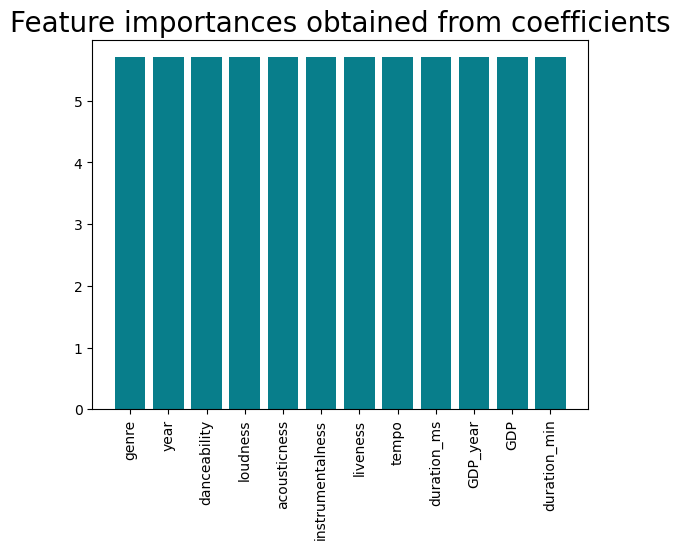

In [20]:
importances = pd.DataFrame(data={
    'Attribute': X_train_loaded.columns,
    'Importance': RR.coef_[0]
})
    
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

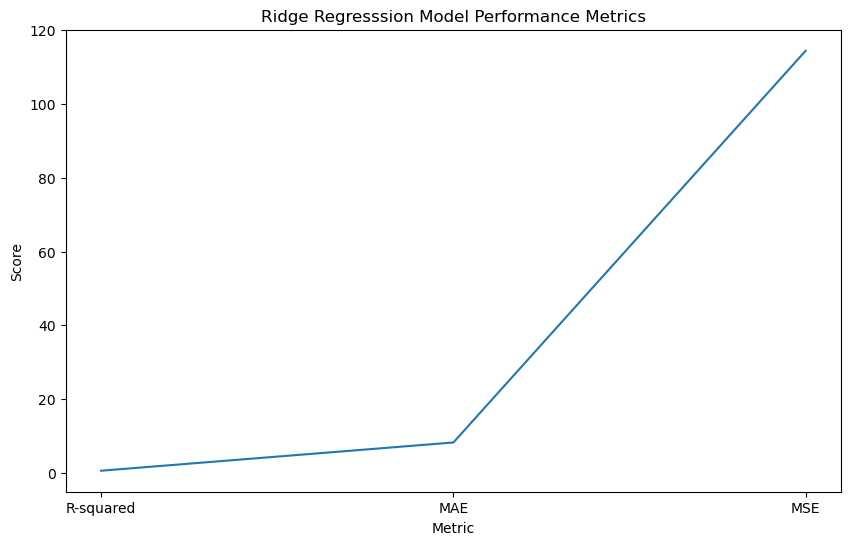

In [21]:
RR_metrics = pd.DataFrame({
    'Metric': ['R-squared', 'MAE', 'MSE'],
    'Score': [r2_score(y_test_loaded, y_te_pred), mean_absolute_error(y_test_loaded, y_te_pred), mean_squared_error(y_test_loaded, y_te_pred)]
})

plt.figure(figsize=(10, 6))
sns.lineplot(x='Metric', y='Score', data= RR_metrics)

plt.title('Ridge Regresssion Model Performance Metrics')
plt.show()

Building a Ridge Regression Model with some of the features in dataset

In [22]:
# Dropping categorical feature(genre) from training set

X_train= X_train_loaded.drop(columns=['genre'],axis =1)
y_train = y_train_loaded.drop(columns=['genre'],axis= 1)

In [23]:
# Dropping categorical feature(genre) from test set

X_test= X_test_loaded.drop(columns=['genre'],axis =1)
y_test = y_test_loaded.drop(columns=['genre'],axis= 1)

In [24]:
# Scaling numerical features

scaler= StandardScaler()

In [25]:
# Defining a new Ridge model

Ri = Ridge()

In [26]:
# Making a pipeline  with scaler and new Ridge model

Ri_pipeline = make_pipeline(scaler, Ri)

In [27]:
# Fitiing the pipeline on training set

Ri_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [28]:
# Prredicting test set with new Ridge pipeline

Ri_preds = Ri_pipeline.predict(X_test)

In [29]:
# Using cross_validate to fit and assess model by setting cv to 5

Ri_cv_results= cross_validate(Ri_pipeline,X_train, y_train, cv=5)

In [30]:
# Assess the RR_ pipeline using cross validation and calculate Mean Absolute Error

Ri_cv_scores = Ri_cv_results['test_score']

# convert MAE scores to positive values

scores = np.abs(Ri_cv_scores)

# summarize the model performance

print('MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

MAE: 0.157 (0.001)


In [31]:
# Calculate r2, mae and mse of model predictions

r2_score(y_test, Ri_preds), mean_absolute_error(y_test, Ri_preds), np.sqrt(mean_squared_error(y_test, Ri_preds))

(0.15791277672680903, 11.74638540470926, 14.555274539589472)

Dropping genre during feature engineering made the Ridge model perform worse. The Elastic net model will also built for the data and assessed.

In [32]:
# Defining a Elastic net model 

EN = ElasticNet()

In [33]:
# Defining a EN pipeline

EN_pipeline= make_pipeline(col_transform, EN)

In [34]:
# Fitting EN pipeline

EN_pipeline.fit(X_train_loaded,y_train_loaded)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['year', 'acousticness',
                                                   'liveness',
                                                   'instrumentalness',
                                                   'duration_min', 'GDP']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['genre'])])),
                ('elasticnet', ElasticNet())])

In [35]:
# Predicting with  EN_pipeline

en_preds = EN_pipeline.predict(X_test_loaded)

In [36]:
# Using cross validate to calculate, mae,mse,r2

EN_cv_results= cross_validate(EN_pipeline,X_train_loaded, y_train_loaded, cv=5)

EN_cv_scores = EN_cv_results['test_score']
scores = np.abs(EN_cv_scores)


In [37]:
# Calculating  MAE,MSE and r2

mae= mean_absolute_error(y_test_loaded,en_preds)
mse = np.sqrt(mean_squared_error(y_test_loaded, en_preds))
r_squared = r2_score(y_test_loaded,en_preds)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared value: {r_squared}')

Mean Absolute Error: 12.10362824435985
Mean Squared Error: 14.811266273776797
R-squared value: 0.12803178481240696


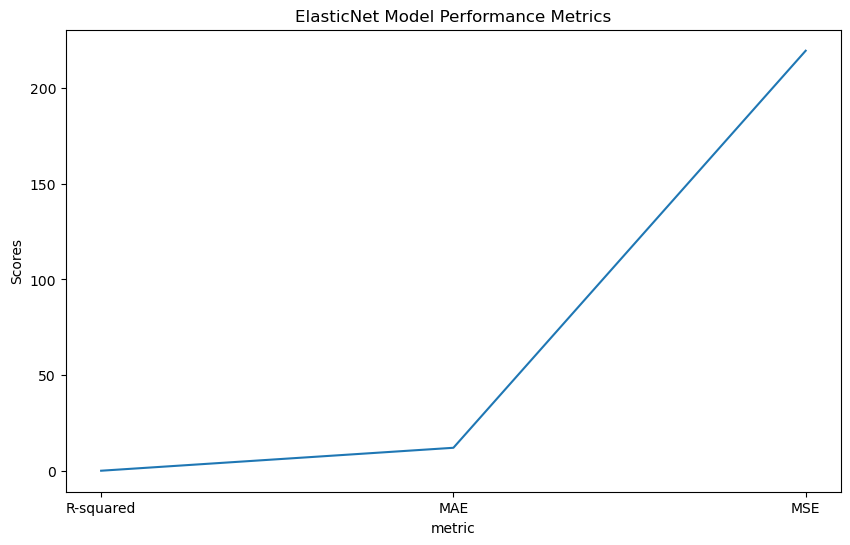

In [38]:
EN_metrics = pd.DataFrame({
    'metric': ['R-squared', 'MAE', 'MSE'],
    'Scores': [r2_score(y_test_loaded, en_preds), mean_absolute_error(y_test_loaded, en_preds), mean_squared_error(y_test_loaded, en_preds)]
})

plt.figure(figsize=(10, 6))
sns.lineplot(x='metric', y='Scores', data= EN_metrics)
plt.title('ElasticNet Model Performance Metrics')
plt.show()

Evaluating the Elastic net model shows even poorer performance. A Decsion tree model will also be built and evaluated.

In [39]:
# Defining a Decisiontree model

Dt = DecisionTreeRegressor(max_depth = 2)

In [40]:
# Defining Dt_pipeline

Dt_pipeline = make_pipeline(col_transform, Dt)
Dt_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['year', 'acousticness',
                                                   'liveness',
                                                   'instrumentalness',
                                                   'duration_min', 'GDP']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['genre'])])),
                ('decisiontreeregressor', DecisionTreeRegressor(max_depth=2))])

In [41]:
# Fitting Dt_pipeline

Dt_pipeline.fit(X_train_loaded,y_train_loaded)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['year', 'acousticness',
                                                   'liveness',
                                                   'instrumentalness',
                                                   'duration_min', 'GDP']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['genre'])])),
                ('decisiontreeregressor', DecisionTreeRegressor(max_depth=2))])

In [42]:
# Using cross validate to fit and assess model

Dt_cv_results= cross_validate(Dt_pipeline,X_train_loaded, y_train_loaded, cv=5)
Dt_cv_scores = Dt_cv_results['test_score']
scores = np.abs(Dt_cv_scores)

In [43]:
# Defining predicted values in train and test set

yhat = Dt_pipeline.predict(X_test_loaded)

In [44]:
# Calculating r2, MAE and MSE of predicted values

r2_score(y_test_loaded, yhat), mean_absolute_error(y_test_loaded, yhat), np.sqrt(mean_squared_error(y_test_loaded, yhat))


(0.15195727026626704, 11.7923876160256, 14.606653603742892)

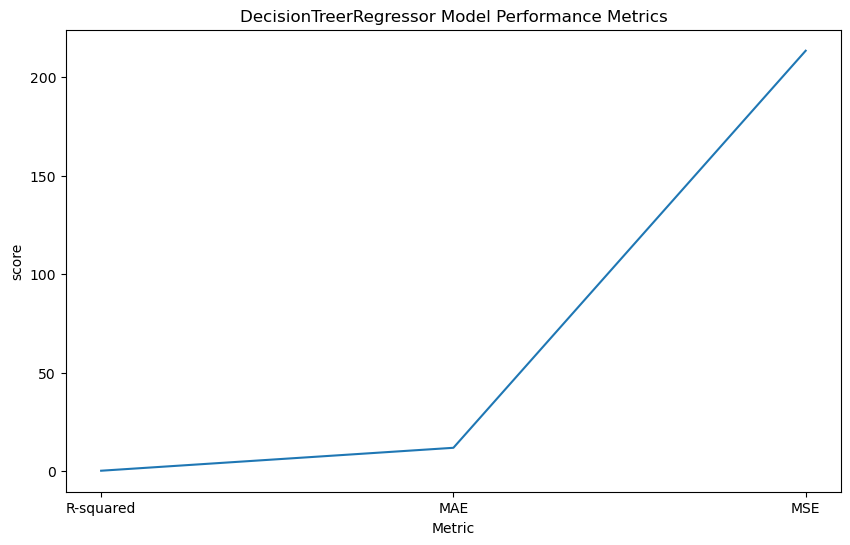

In [45]:
Dt_metrics = pd.DataFrame({
    'Metric': ['R-squared', 'MAE', 'MSE'],
    'score': [r2_score(y_test_loaded, yhat), mean_absolute_error(y_test_loaded, yhat), mean_squared_error(y_test_loaded, yhat)]
})

plt.figure(figsize=(10, 6))
sns.lineplot(x='Metric', y='score', data= Dt_metrics)
plt.title('DecisionTreerRegressor Model Performance Metrics')
plt.show()

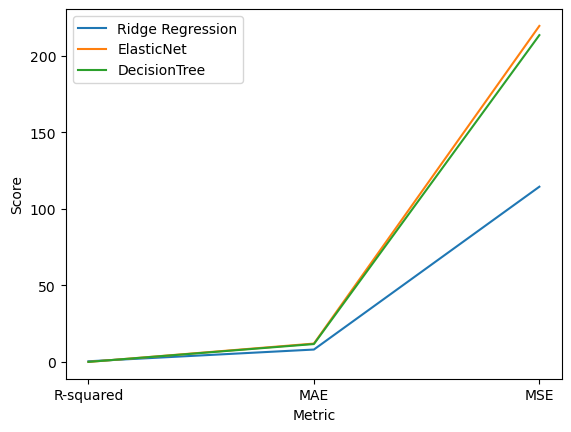

In [67]:
# Assessing all models on one graph 

Dt_metrics = pd.DataFrame({
    'Metric': ['R-squared', 'MAE', 'MSE'],
    'score': [r2_score(y_test_loaded, yhat), mean_absolute_error(y_test_loaded, yhat), mean_squared_error(y_test_loaded, yhat)]})


EN_metrics = pd.DataFrame({
    'metric': ['R-squared', 'MAE', 'MSE'],
    'Scores': [r2_score(y_test_loaded, en_preds), mean_absolute_error(y_test_loaded, en_preds), mean_squared_error(y_test_loaded, en_preds)]})

RR_metrics = pd.DataFrame({
    'Metric': ['R-squared', 'MAE', 'MSE'],
    'Score': [r2_score(y_test_loaded, y_te_pred), mean_absolute_error(y_test_loaded, y_te_pred), mean_squared_error(y_test_loaded, y_te_pred)]})


# Plot a simple line chart
sns.lineplot(x= 'Metric', y='Score',data= RR_metrics, label='Ridge Regression')

# Plot another line on the same chart/graph
sns.lineplot(x= 'metric',y='Scores', data= EN_metrics, label= 'ElasticNet')

sns.lineplot(x= 'Metric', y='score', data= Dt_metrics,label ='DecisionTree')
plt.legend()
plt.show()

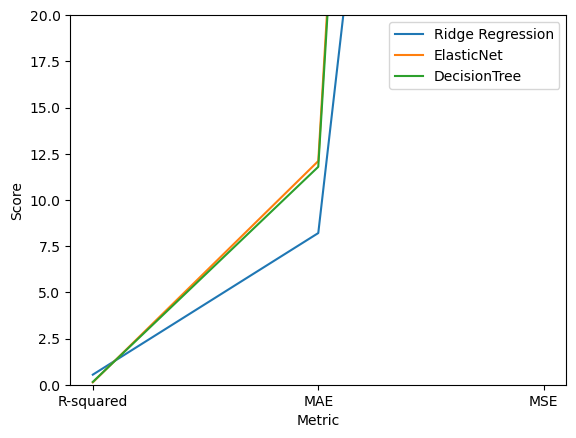

In [68]:
# Showing R-square values visually

Dt_metrics = pd.DataFrame({
    'Metric': ['R-squared', 'MAE', 'MSE'],
    'score': [r2_score(y_test_loaded, yhat), mean_absolute_error(y_test_loaded, yhat), mean_squared_error(y_test_loaded, yhat)]})


EN_metrics = pd.DataFrame({
    'metric': ['R-squared', 'MAE', 'MSE'],
    'Scores': [r2_score(y_test_loaded, en_preds), mean_absolute_error(y_test_loaded, en_preds), mean_squared_error(y_test_loaded, en_preds)]})

RR_metrics = pd.DataFrame({
    'Metric': ['R-squared', 'MAE', 'MSE'],
    'Score': [r2_score(y_test_loaded, y_te_pred), mean_absolute_error(y_test_loaded, y_te_pred), mean_squared_error(y_test_loaded, y_te_pred)]})


# Plot a simple line chart
sns.lineplot(x= 'Metric', y='Score',data= RR_metrics, label='Ridge Regression')

# Plot another line on the same chart/graph
sns.lineplot(x= 'metric',y='Scores', data= EN_metrics, label= 'ElasticNet')

sns.lineplot(x= 'Metric', y='score', data= Dt_metrics,label ='DecisionTree')
plt.ylim(0,20)
plt.legend()
plt.show()

In [47]:
# Defining a RandonForest model

RF= RandomForestClassifier(n_estimators = 2)

# Defining Dt_pipeline

RF_pipeline = make_pipeline(col_transform, RF)

# Fitting RF_pipeline

model_res = RF_pipeline.fit(X_train_loaded,y_train_loaded)

In [69]:
# Predicting test values with RF model 

y_pred = model_res.predict(X_test_loaded)
y_pred_prob = model_res.predict_proba(X_test_loaded)
lr_probs = y_pred_prob[:,1]

# Assessing RF model

ac = accuracy_score(y_test_loaded, y_pred)

f1 = f1_score(y_test_loaded, y_pred, average='weighted')
cm = confusion_matrix(y_test_loaded, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.133
Random Forest: f1-score=0.115


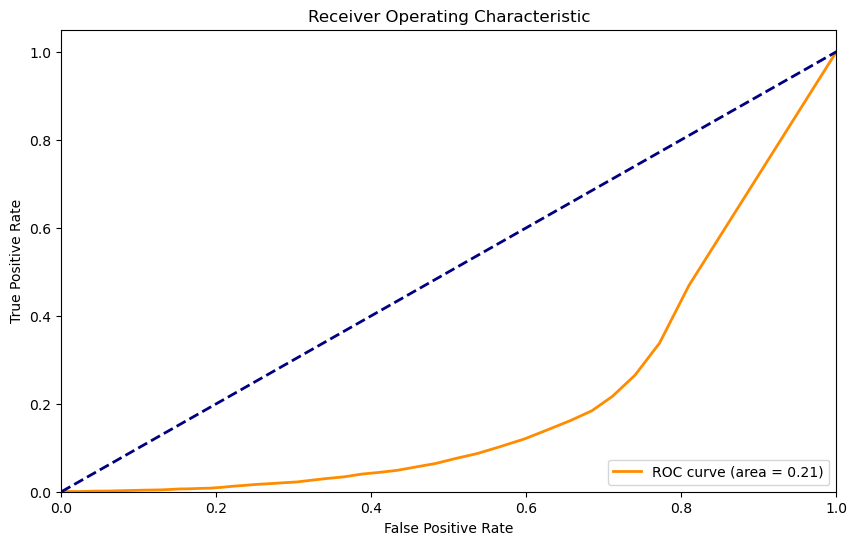

In [66]:
# Determining the Area under the curve.

y_score = model_res.predict_proba(X_test_loaded)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_loaded, y_pred, pos_label= 1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

SUMMARY

A thorough evaluation of the models built shows that our initial Ridge model(RR_model), built by scaling numerical features with StandardScaler() and converting categorical features with OneHotEncoder() performs best.

The r2 values of both the training and predicted values reflects no overfitting. Assessing the RR_model showed the highest r2 value when compared to the other models. This indicates that the model works better than all the other models evaluated at this stage of the project. 

Showing the lowest MAE and MSE scores reveals that it performs with minimal errors compared to the other models evaluated.

Assessing the performance of the only non-linear model built, RF_model showed very low accuracy and F1 scores.The area under the curve is 0.21 which signifies that model is behaving poorly
